In [34]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense , Flatten

# Load Dataset

In [21]:
X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter = ',')
Y_test = np.loadtxt('labels_test.csv',delimiter = ',')


In [30]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)

X_train = X_train/255.0
X_test = X_test/255.0

In [31]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)

Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


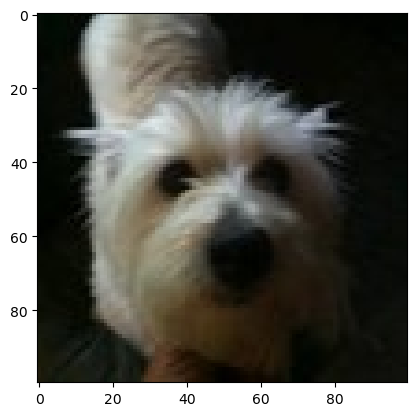

In [45]:
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

# Model

In [47]:
model = Sequential([
    Conv2D(32,(3,3), activation = 'relu',input_shape = (100,100,3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64,activation = 'relu'),
    Dense(1, activation = 'sigmoid')
    
])  

In [48]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [77]:
model.fit(X_train,Y_train,epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 3s 96ms/step - loss: 0.1228 - accuracy: 0.9585
Epoch 2/5
32/32 [==============================] - 3s 98ms/step - loss: 0.0831 - accuracy: 0.9780
Epoch 3/5
32/32 [==============================] - 4s 115ms/step - loss: 0.0542 - accuracy: 0.9910
Epoch 4/5
32/32 [==============================] - 3s 96ms/step - loss: 0.0323 - accuracy: 0.9955
Epoch 5/5
32/32 [==============================] - 3s 96ms/step - loss: 0.0204 - accuracy: 0.9980


In [51]:
model.evaluate(X_test,Y_test)

13/13 [==============================] - 0s 13ms/step - loss: 1.0153 - accuracy: 0.6350


[1.0153107643127441, 0.6349999904632568]

# Making Predictions

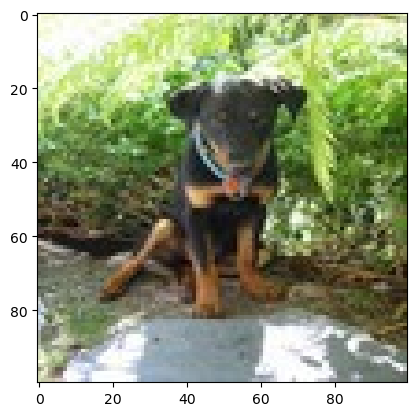

1/1 [==============================] - 0s 10ms/step
Our model says it is a : dog


In [117]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
    
print("Our model says it is a :",pred)